In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [177]:
df= pd.read_csv('players_20.csv')

In [178]:
pd.set_option("display.max_columns", None)
df.sample(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15856,239858,https://sofifa.com/player/239858/long-song/20/...,Song Long,宋龙,29,1989-08-20,181,69,China PR,Shandong Luneng TaiShan FC,59,59,130000,3000,"RB, LB, CDM",Right,1,3,2,Medium/Medium,Lean,No,202000.0,NaN,SUB,39.0,NaN,2016-07-15,2021.0,NaN,NaN,64.0,32.0,51.0,58.0,57.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,40,62,63,22,57,31,34,61,58,68,61,58,54,65,24,59,70,70,20,62,55,43,32,38,53,58,54,58,9,6,9,7,14,48+2,48+2,48+2,51+2,49+2,49+2,49+2,51+2,50+2,50+2,50+2,54+2,53+2,53+2,53+2,54+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2
4059,247204,https://sofifa.com/player/247204/emerson-leite...,Emerson,Emerson Leite De Souza,20,1999-01-14,181,79,Brazil,Real Betis,71,83,3900000,9000,RB,Right,1,3,3,High/Medium,Lean,No,8900000.0,NaN,RB,22.0,NaN,2019-07-02,2021.0,NaN,NaN,82.0,56.0,61.0,67.0,67.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,48,64,66,44,67,54,47,58,66,81,82,71,69,61,72,72,74,71,60,77,67,64,54,48,64,62,69,74,11,13,9,10,13,64+2,64+2,64+2,65+2,64+2,64+2,64+2,65+2,63+2,63+2,63+2,66+2,63+2,63+2,63+2,66+2,69+2,66+2,66+2,66+2,69+2,70+2,68+2,68+2,68+2,70+2
2339,240046,https://sofifa.com/player/240046/joao-victor-s...,João Victor,João Victor Santos Sá,25,1994-03-27,178,72,Brazil,VfL Wolfsburg,74,76,7000000,37000,"LW, LM",Left,1,5,4,Medium/Medium,Lean,No,12400000.0,NaN,LF,40.0,NaN,2019-07-01,2023.0,NaN,NaN,88.0,73.0,66.0,74.0,31.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Early Crosser",68,76,54,69,58,73,69,34,64,74,89,88,80,70,74,73,34,77,61,68,31,33,76,69,70,72,24,30,28,8,13,13,11,14,72+2,72+2,72+2,74+2,73+2,73+2,73+2,74+2,72+2,72+2,72+2,73+2,66+2,66+2,66+2,73+2,57+2,51+2,51+2,51+2,57+2,53+2,41+2,41+2,41+2,53+2
8399,170636,https://sofifa.com/player/170636/alan-lithgow/...,A. Lithgow,Alan Lithgow,31,1988-03-12,185,85,Scotland,Livingston FC,67,67,575000,3000,CB,Right,1,3,2,Medium/High,Stocky,No,1000000.0,NaN,RCB,4.0,NaN,2018-05-23,2020.0,NaN,NaN,55.0,37.0,46.0,46.0,65.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Diver, Avoids Using Weaker Foot",31,39,69,55,29,41,31,21,50,47,58,53,56,65,58,35,72,56,76,36,73,65,42,52,34,68,65,65,62,13,15,16,10,14,48+2,48+2,48+2,46+2,47+2,47+2,47+2,46+2,48+2,48+2,48+2,47+2,51+2,51+2,51+2,47+2,55+2,59+2,59+2,59+2,55+2,57+2,65+2,65+2,65+2,57+2
12660,230801,https://sofifa.com/player/230801/ali-abdullah-...,A. Hazazi,Ali Abdullah Hazazi,25,1994-02-18,183,63,Saudi Arabia,Ettifaq FC,63,68,450000,5000,"CDM, CM",Left,1,3,2,Medium/Medium,Lean,No,776000.0,NaN,LDM,11.0,NaN,2017-07-04,2024.0,NaN,NaN,65.0,44.0,58.0,63.0,60.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,43,58,65,32,62,42,36,58,65,64,65,62,57,68,52,71,74,65,37,62,59,52,59,44,57,61,61,59,14,10,8,11,14,54+2,54+2,54+2,57+2,57+2,57+2,57+2,57+2,58+2,58+2,58+2,60+2,60+2,60+2,60+2,60+2,61+2,61+2,61+2,61+2,61+2,61+2,61+2,61+2,61+2,61+2
174

In [179]:
df.shape

(18278, 104)

In [180]:
# filtering out early on columns which would be irrelevant for this project
irrelvant_cols=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'body_type', 'player_tags','loaned_from', 'joined',
                'team_jersey_number', 'nation_jersey_number', 'contract_valid_until', 'player_traits']

In [181]:
fifa= df.drop(irrelvant_cols, axis=1)

In [182]:
# separating numerical and categorical columns
num_cols=[]
cat_cols=[]

for col in fifa.columns:
    if fifa[col].dtype=='object':
        cat_cols.append(col)

    else:
        num_cols.append(col)

In [183]:
fifa.shape

(18278, 91)

In [184]:
'''creating a dedicated subset of fifa giving only players infomation (not the skills and attributes)
this dataset will be used to analysed '''
players_info= fifa[['short_name','age', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 
                    'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
                    'skill_moves', 'work_rate', 'release_clause_eur', 'team_position', 
                    ]]

In [185]:
players_info.shape

(18278, 17)

## Dealing with Missing Values

In [186]:
gk_attribute_cols= ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [187]:
fifa[gk_attribute_cols]=fifa[gk_attribute_cols].fillna(0)

In [188]:
fifa.sample(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
14985,D. Lia,21,175,70,Italy,Castellammare di Stabia,60,69,290000,1000,RB,Right,1,2,2,High/Medium,508000.0,RB,NaN,64.0,26.0,50.0,54.0,59.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,54,23,45,57,27,52,41,30,50,51,66,63,61,52,75,25,57,65,47,25,51,60,47,42,33,49,56,66,62,11,8,12,8,8,42+2,42+2,42+2,49+2,46+2,46+2,46+2,49+2,48+2,48+2,48+2,51+2,51+2,51+2,51+2,51+2,58+2,56+2,56+2,56+2,58+2,58+2,56+2,56+2,56+2,58+2
3719,B. Guzan,34,193,95,United States,Atlanta United,72,72,1400000,5000,GK,Left,2,2,1,Medium/Medium,2000000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,68.0,72.0,74.0,37.0,72.0,16,14,12,26,15,14,15,11,34,28,38,37,37,68,47,54,67,30,63,15,35,19,12,51,35,53,12,15,14,72,68,72,72,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15344,A. Trubin,17,199,86,Ukraine,Shakhtar Donetsk,59,79,260000,1000,GK,Right,1,2,1,Medium/Medium,806000.0,SUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,58.0,57.0,63.0,29.0,57.0,11,9,12,18,6,13,13,13,24,11,33,25,34,54,45,43,51,24,43,8,28,9,6,31,18,37,9,11,11,55,58,57,57,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076,L. Fer,29,188,79,Netherlands,Feyenoord,73,73,3400000,11000,"CDM, CM",Right,2,4,3,Medium/Medium,5100000.0,RCM,NaN,68.0,72.0,68.0,72.0,69.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,67,67,78,73,66,75,49,44,74,72,65,71,68,70,51,85,83,82,79,73,82,68,65,68,72,72,67,70,69,9,8,14,16,14,72+2,72+2,72+2,69+2,70+2,70+2,70+2,69+2,70+2,70+2,70+2,70+2,71+2,71+2,71+2,70+2,70+2,72+2,72+2,72+2,70+2,70+2,72+2,72+2,72+2,70+2
15802,Wang Qiuming,26,173,64,China PR,Hebei China Fortune FC,59,60,180000,2000,"LM, CM",Right,1,3,2,High/Medium,293000.0,LM,NaN,73.0,53.0,57.0,58.0,44.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,56,53,55,58,57,55,49,48,57,57,61,82,71,44,82,52,90,66,64,54,57,43,59,60,49,52,45,42,42,7,6,12,11,15,56+2,56+2,56+2,57+2,56+2,56+2,56+2,57+2,57+2,57+2,57+2,58+2,55+2,55+2,55+2,58+2,53+2,51+2,51+2,51+2,53+2,52+2,50+2,50+2,50+2,52+2
4265,J. Price,26,170,69,England,Colorado Rapids,71,74,2700000,5000,"CDM, CM",Right,1,3,2,Medium/High,4000000.0,SUB,NaN,52.0,47.0,71.0,64.0,63.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,65,37,46,75,34,59,62,59,77,67,55,49,71,70,84,57,69,77,65,61,82,68,49,70,50,74,66,64,61,14,9,15,10,9,53+2,53+2,53+2,59+2,58+2,58+2,58+2,59+2,63+2,63+2,63+2,62+2,68+2,68+2,68+2,62+2,66+2,70+2,70+2,70+2,66+2,64+2,64+2,64+2,64+2,64+2
10661,R. Fuenzalida,26,163,63,Chile,Audax Italiano,65,66,625000,2000,"RM, RW",Right,1,3,2,High/High,891000.0,SUB,NaN,90.0,49.0,59.0,66.0,29.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,65,50,31,62,36,64,41,47,57,60,89,91,83,57,93,55,50,78,44,45,31,21,55,55,48,47,31,29,34,9,10,7,14,7,55+2,55+2,55+2,63+2,59+2,59+2,59+2,63+2,60+2,60+2,60+2,64+2,55+2,55+2,55+2,64+2,53+2,45+2,45+2,45+2,53+2,50+2,36+2,36+2,36+2,50+2
10735,A. Raineau,33,178,75,France,La Berrichonne de Châteauroux,65,65,240000,2000,LB,Left,1,2,2,Medium/Medium,420000.0,SUB,NaN,55.0,48.0,60.

In [189]:
fifa[fifa['team_position']=='GK']

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,Shen Jun,32,186,88,China PR,Shanghai Greenland Shenhua FC,56,56,50000,2000,GK,Right,1,1,1,Medium/Medium,78000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,48.0,56.0,62.0,44.0,56.0,11,14,15,26,16,11,20,17,21,16,40,47,30,52,48,42,55,32,72,12,19,23,14,16,24,22,23,17,13,57,48,56,56,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17341,M. McGinley,29,185,86,Republic of Ireland,Finn Harps,55,57,70000,1000,GK,Right,1,2,1,Medium/Medium,114000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,55.0,52.0,57.0,41.0,55.0,13,15,11,15,12,12,19,15,13,24,40,42,54,47,49,39,50,31,61,14,34,11,13,10,13,47,12,19,18,55,55,52,55,57,NaN,N

In [190]:
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in fifa.index:
    if 'GK' in fifa.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(fifa.loc[index, col]):
                fifa.loc[index, col]=0

In [191]:
fifa[fifa['team_position']=='GK'].head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [192]:
fifa.sample(15)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12042,M. Schwabl,28,182,71,Germany,SpVgg Unterhaching,64,64,375000,2000,"RB, CDM",Right,1,2,2,Medium/High,544000.0,RB,NaN,71.0,41.0,55.0,59.0,61.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,56,35,58,63,36,55,49,38,59,61,71,71,69,58,70,49,78,90,66,43,76,59,44,42,48,55,64,60,59,9,10,14,7,10,52+2,52+2,52+2,55+2,53+2,53+2,53+2,55+2,54+2,54+2,54+2,58+2,57+2,57+2,57+2,58+2,63+2,62+2,62+2,62+2,63+2,63+2,62+2,62+2,62+2,63+2
14132,D. Rosales,21,171,66,Mexico,U.N.A.M.,61,73,400000,2000,RB,Right,1,2,2,High/Medium,760000.0,SUB,NaN,68.0,36.0,53.0,57.0,60.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,63,32,52,57,34,54,40,42,54,56,70,67,65,64,75,45,55,52,45,34,56,57,49,43,42,45,62,63,60,14,13,8,6,7,49+2,49+2,49+2,54+2,51+2,51+2,51+2,54+2,52+2,52+2,52+2,55+2,53+2,53+2,53+2,55+2,59+2,57+2,57+2,57+2,59+2,60+2,57+2,57+2,57+2,60+2
9709,Choi Bo Kyung,31,184,79,Korea Republic,Jeonbuk Hyundai Motors,66,66,475000,3000,CB,Left,1,3,2,Medium/Medium,618000.0,SUB,NaN,62.0,39.0,56.0,54.0,63.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,47,32,60,67,41,47,34,35,58,55,64,61,71,68,64,52,67,76,72,43,67,71,32,57,45,51,56,66,62,8,10,14,15,10,50+2,50+2,50+2,51+2,50+2,50+2,50+2,51+2,53+2,53+2,53+2,54+2,58+2,58+2,58+2,54+2,62+2,64+2,64+2,64+2,62+2,63+2,64+2,64+2,64+2,63+2
7278,J. Fejzić,33,198,95,Bosnia Herzegovina,Eintracht Braunschweig,68,68,475000,2000,GK,Right,1,2,1,Medium/Medium,689000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,69.0,65.0,59.0,74.0,27.0,66.0,11,11,13,23,8,15,12,15,16,24,18,34,25,61,19,44,49,27,75,9,34,14,8,32,20,12,12,13,14,69,65,59,66,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
956,G. Ramírez,28,183,78,Uruguay,Sampdoria,78,78,10500000,39000,CAM,Left,2,3,4,Medium/Low,17900000.0,RW,NaN,63.0,75.0,78.0,79.0,39.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,74,74,57,80,71,80,79,79,77,81,65,61,77,74,73,76,65,60,51,76,69,32,74,79,73,76,30,45,39,14,15,7,7,8,71+2,71+2,71+2,75+2,75+2,75+2,75+2,75+2,77+2,77+2,77+2,74+2,73+2,73+2,73+2,74+2,58+2,58+2,58+2,58+2,58+2,55+2,49+2,49+2,49+2,55+2
13033,L. Mulholland,30,173,75,England,Real Salt Lake,63,63,350000,2000,"CM, CDM",Right,1,3,3,High/Medium,525000.0,RES,NaN,59.0,60.0,60.0,62.0,62.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,56,59,62,63,58,61,58,55,59,64,58,59,54,64,75,65,63,63,63,58,71,62,63,60,59,64,61,64,62,11,14,7,9,12,61+2,61+2,61+2,60+2,61+2,61+2,61+2,60+2,61+2,61+2,61+2,60+2,61+2,61+2,61+2,60+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2
11634,D. Berntsen,26,175,65,Norway,Tromsø IL,64,67,550000,1000,"CAM, CF, LM",Left,1,2,3,Medium/Medium,729000.0,SUB,NaN,71.0,64.0,61.0,69.0,42.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,61,63,40,64,68,66,70,58,57,68,74,68,83,56,86,70,63,64,56,63,37,38,53,58,51,56,54,36,35,8,10,12,7,15,60+2,60+2,60+2,64+2,62+2,62+2,62+2,64+2,63+2,63+2,63+2,63+2,58+2,58+2,58+2,63+2,54+2,51+2,51+2,51+2,54+2,52+2,46+2,46+2,46+2,52+2
188,S. Haller,25,190,82,France,West Ham United,83,85,32000000,120000,ST,Right,1,2,3,High/Medium,63200000.0,ST,NaN,72.0,81.0,62.0,76.0,51.0,82.0,0.0,0.0,0.0,

In [193]:
import missingno as msno

<AxesSubplot:>

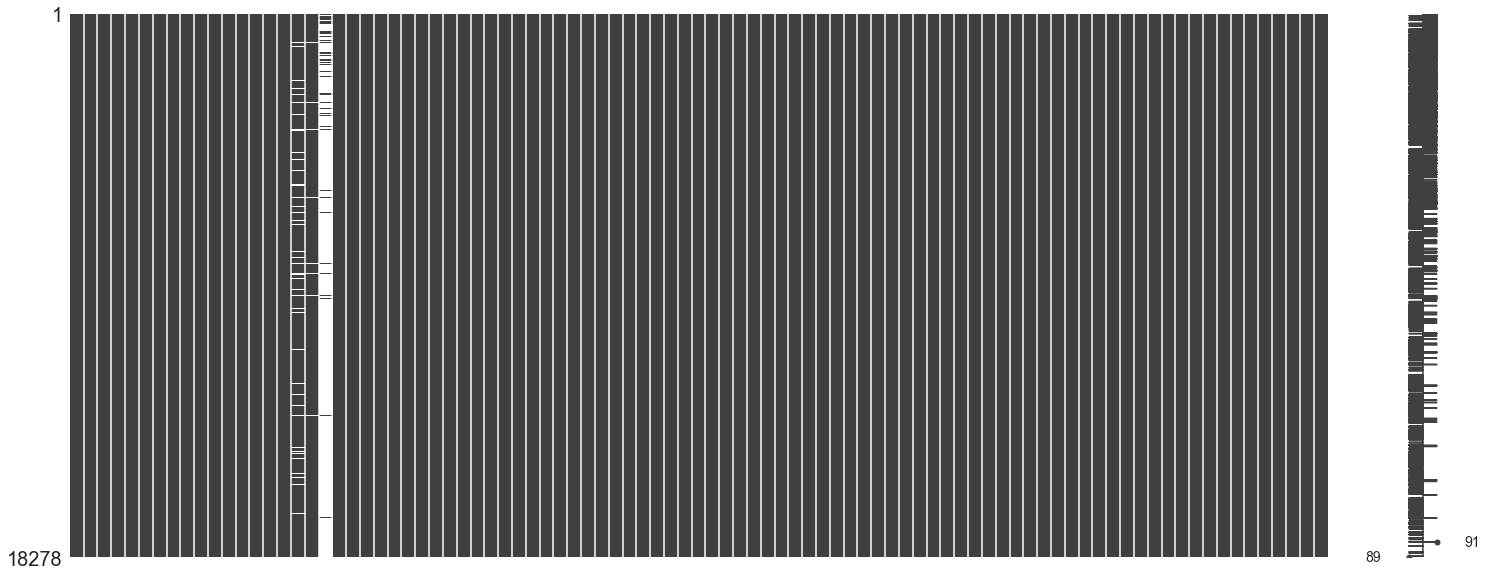

In [194]:
msno.matrix(fifa)

In [195]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]*100

nation_position       93.839589
release_clause_eur     7.101433
team_position          1.313054
short_name             0.000000
goalkeeping_diving     0.000000
                        ...    
gk_positioning         0.000000
gk_speed               0.000000
gk_reflexes            0.000000
gk_kicking             0.000000
rb                     0.000000
Length: 91, dtype: float64

In [196]:
# deleting column 'nation_position'

fifa.drop('nation_position', axis=1, inplace=True)

We will replace missing values in team_position column by 'Not Given'

In [197]:
fifa['team_position']=fifa['team_position'].fillna('Not Given')

In [200]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]

release_clause_eur          0.071014
short_name                  0.000000
defending_sliding_tackle    0.000000
rs                          0.000000
st                          0.000000
                              ...   
gk_positioning              0.000000
gk_speed                    0.000000
gk_reflexes                 0.000000
gk_kicking                  0.000000
rb                          0.000000
Length: 90, dtype: float64

Now only one column is remained with the missing value. We do not want to directly drop the row as we could loose data on some important players. So let us wait for the EDA part and impute the missing value

# Exploratory Data Analysis

## Univariate Analysis

### Height, Weight and Age Distribution

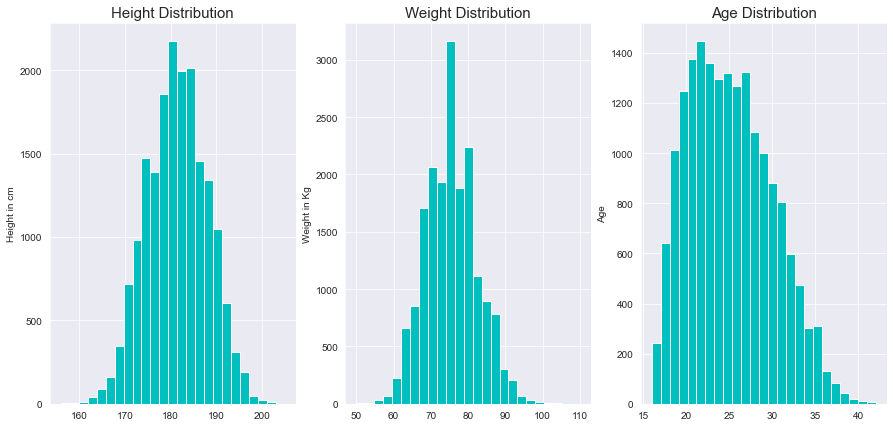

In [231]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(fifa['height_cm'], bins=25, color='c')
plt.ylabel('Height in cm')
plt.title('Height Distribution'.title(), fontsize=15)

plt.subplot(1,3,2)
plt.hist(fifa['weight_kg'], bins=25, color='c')
plt.ylabel('Weight in Kg')
plt.title('Weight Distribution'.title(), fontsize=15)

plt.subplot(1,3,3)
plt.hist(fifa['age'], bins=25, color='c')
plt.ylabel('Age')
plt.title('Age Distribution'.title(), fontsize=15);

- Both attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

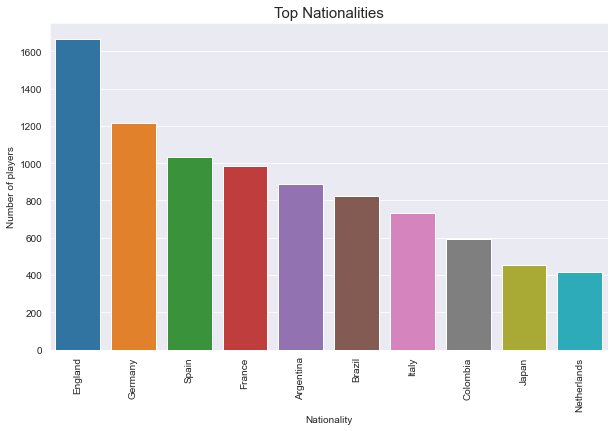

In [252]:
top_nationalities=fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(top_nationalities.keys(), top_nationalities)
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15);

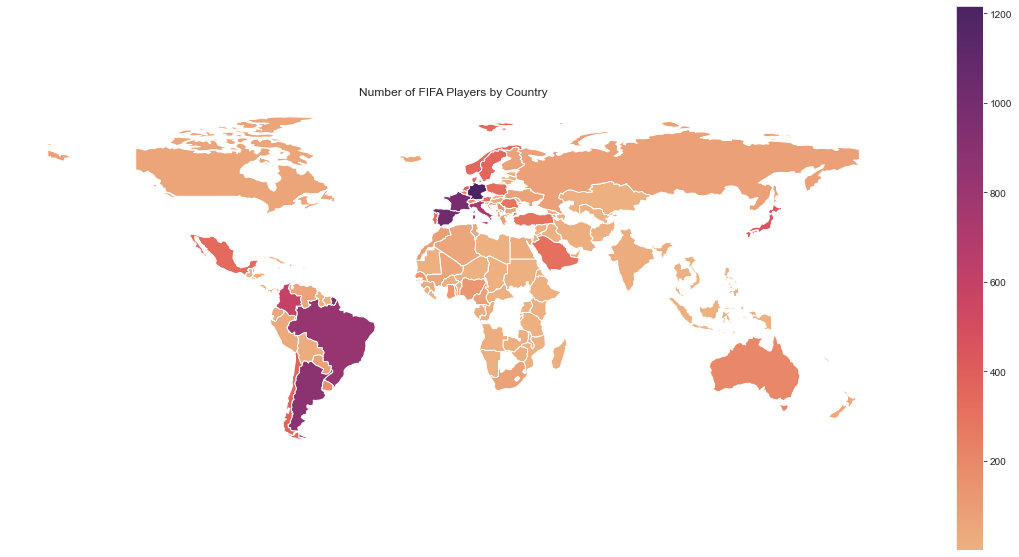

In [269]:
import geopandas as gpd

nationality_counts = fifa.groupby('nationality').size().reset_index(name='count')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(nationality_counts, left_on='name', right_on='nationality')

# plot the choropleth map
fig, ax = plt.subplots(figsize=(20, 10))
merged.plot(column='count', cmap='flare', ax=ax, legend=True)
ax.set_title('Number of FIFA Players by Country')
ax.set_axis_off()
plt.show()


- England has the highest percentage of players in the dataset at 9.12%.
- The top 10 nationalities together account for more than 45% of the players in the dataset, indicating a concentration of players from a relatively small number of countries.
- European countries dominate the top 10, with six of them being from Europe.
- South American countries are also well represented in the top 10, with Argentina and Brazil being in the top 5.
- Japan is the only Asian country in the top 10, indicating a relatively smaller presence of players from Asia in the dataset.
- The differences in percentages between the top 10 countries are relatively small, with the highest percentage (England) being only about 6 percentage points higher than the 10th highest percentage (Netherlands). This suggests a relatively even distribution of players across the top 10 countries in the dataset.

In [257]:
fifa.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Value of Player

<AxesSubplot:ylabel='release_clause_eur'>

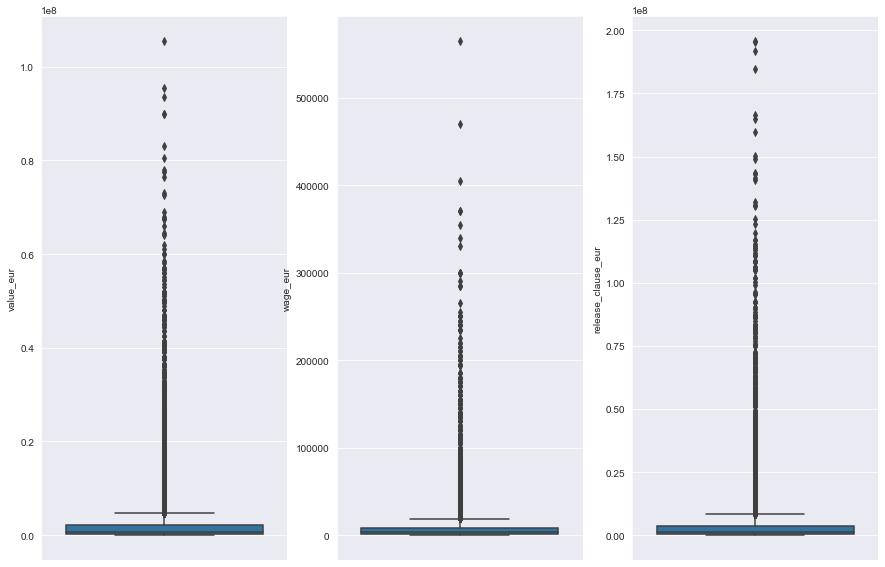

In [277]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y='value_eur',data=fifa)

plt.subplot(1,3,2)
sns.boxplot(y='wage_eur',data=fifa)

plt.subplot(1,3,3)
sns.boxplot(y='release_clause_eur',data=fifa)

- There are players who have zero market value, wage, and/or release clause.
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

In [ ]:
fifa[fifa['release_clause_eur'].isna()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
68,Coutinho,27,172,68,Brazil,FC Bayern München,86,86,46500000,175000,"LW, CM",Right,3,4,5,High/Medium,NaN,LCM,79.0,80.0,84.0,90.0,52.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,79,77,48,84,78,90,90,86,82,91,84,75,92,82,93,82,59,76,61,88,59,49,84,86,70,77,55,54,47,12,7,9,14,6,78+3,78+3,78+3,84+3,83+3,83+3,83+3,84+3,85+3,85+3,85+3,83+3,81+3,81+3,81+3,83+3,70+3,68+3,68+3,68+3,70+3,66+3,58+3,58+3,58+3,66+3
140,I. Perišić,30,186,80,Croatia,FC Bayern München,84,84,29500000,135000,LM,Right,3,5,4,Medium/Medium,NaN,SUB,84.0,80.0,78.0,82.0,62.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,83,79,80,78,81,82,73,75,74,85,83,85,77,79,74,84,84,89,76,78,65,69,83,76,76,80,64,52,54,6,7,10,9,6,81+3,81+3,81+3,81+3,81+3,81+3,81+3,81+3,80+3,80+3,80+3,81+3,77+3,77+3,77+3,81+3,74+3,71+3,71+3,71+3,74+3,72+3,67+3,67+3,67+3,72+3
159,G. Lo Celso,23,177,68,Argentina,Tottenham Hotspur,83,89,35000000,105000,"CM, CAM, CF",Left,1,3,4,High/Medium,NaN,SUB,77.0,78.0,82.0,85.0,65.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,78,80,57,83,69,85,82,71,83,86,76,78,83,82,79,82,63,79,70,76,72,71,79,85,65,81,61,67,62,10,7,10,15,14,77+2,77+2,77+2,81+2,81+2,81+2,81+2,81+2,82+2,82+2,82+2,81+2,81+2,81+2,81+2,81+2,75+2,75+2,75+2,75+2,75+2,72+2,68+2,68+2,68+2,72+2
187,Morata,26,189,84,Spain,Atlético Madrid,83,85,32000000,80000,ST,Right,3,4,3,High/High,NaN,LS,81.0,79.0,71.0,80.0,31.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,73,81,86,78,80,83,76,44,51,82,75,85,66,80,58,80,84,70,79,72,56,24,85,76,70,76,37,14,20,4,5,4,4,5,81+3,81+3,81+3,79+3,80+3,80+3,80+3,79+3,78+3,78+3,78+3,77+3,69+3,69+3,69+3,77+3,56+3,52+3,52+3,52+3,56+3,53+3,48+3,48+3,48+3,53+3
212,R. Nainggolan,31,176,77,Belgium,Cagliari,83,83,22500000,51000,"CAM, CM",Right,3,3,3,High/High,NaN,CAM,72.0,79.0,78.0,83.0,83.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,73,75,59,84,75,83,73,68,81,84,72,72,75,85,83,84,75,89,76,86,88,86,84,76,63,84,83,86,90,11,11,14,8,11,78+3,78+3,78+3,79+3,80+3,80+3,80+3,79+3,81+3,81+3,81+3,80+3,82+3,82+3,82+3,80+3,83+3,84+3,84+3,84+3,83+3,82+3,81+3,81+3,81+3,82+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18091,T. Maloney,20,175,65,England,Newport County,50,67,60000,1000,CM,Right,1,3,2,Medium/Medium,NaN,RES,67.0,35.0,51.0,47.0,47.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,39,27,48,60,32,42,39,48,58,43,65,68,65,51,81,53,62,62,39,30,59,42,46,46,38,35,53,44,48,13,7,10,6,11,44+2,44+2,44+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,50+2,50+2,50+2,50+2,50+2,50+2,48+2,48+2,48+2,50+2
18124,A. Karo,22,180,65,Cyprus,US Salernitana 1919,50,63,50000,1000,CB,Right,1,2,2,Medium/Medium,NaN,RES,53.0,27.0,30.0,32.0,45.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,24,26,47,36,28,23,30,25,22,32,52,53,46,51,71,3

In [ ]:
fifa.sample(15)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3906,Y. Touzghar,32,179,75,Tunisia,ESTAC Troyes,72,72,2500000,7000,ST,Right,1,3,3,High/Low,4300000.0,ST,72.0,71.0,56.0,69.0,24.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,51,73,73,62,71,67,51,55,57,69,67,76,80,69,74,71,80,71,73,64,55,18,75,52,69,69,18,20,21,14,14,7,15,12,70+2,70+2,70+2,66+2,68+2,68+2,68+2,66+2,65+2,65+2,65+2,65+2,59+2,59+2,59+2,65+2,47+2,45+2,45+2,45+2,47+2,45+2,42+2,42+2,42+2,45+2
10932,Kwak Hae Seong,27,178,73,Korea Republic,Incheon United FC,65,65,475000,1000,RB,Right,1,3,2,Medium/Medium,594000.0,SUB,70.0,48.0,52.0,64.0,62.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,65,57,53,58,31,63,42,33,48,62,69,70,70,60,72,43,59,74,70,39,68,63,49,39,46,55,61,64,63,12,6,11,14,12,56+2,56+2,56+2,59+2,56+2,56+2,56+2,59+2,55+2,55+2,55+2,59+2,55+2,55+2,55+2,59+2,64+2,60+2,60+2,60+2,64+2,63+2,62+2,62+2,62+2,63+2
4391,R. Schüller,28,177,67,Finland,Minnesota United FC,71,72,2400000,6000,"CDM, CM, LM",Left,1,3,3,Medium/High,3700000.0,SUB,55.0,54.0,61.0,65.0,69.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,47,52,59,68,34,63,42,32,70,68,55,55,68,68,65,60,61,72,62,59,77,70,46,69,46,69,70,72,69,14,15,8,14,14,57+2,57+2,57+2,59+2,60+2,60+2,60+2,59+2,63+2,63+2,63+2,61+2,66+2,66+2,66+2,61+2,65+2,69+2,69+2,69+2,65+2,65+2,67+2,67+2,67+2,65+2
16512,J. Pask,21,187,76,England,Coventry City,57,68,160000,1000,"CB, RB",Right,1,2,2,Medium/Medium,312000.0,SUB,59.0,26.0,38.0,39.0,55.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,29,21,55,48,20,32,19,26,37,42,55,62,53,41,52,38,64,52,70,26,67,52,33,38,21,47,58,54,52,10,8,14,7,14,39+2,39+2,39+2,38+2,38+2,38+2,38+2,38+2,39+2,39+2,39+2,39+2,41+2,41+2,41+2,39+2,47+2,49+2,49+2,49+2,47+2,49+2,55+2,55+2,55+2,49+2
5635,A. Benedetti,27,170,64,Italy,Cittadella,70,70,1600000,2000,LB,Left,1,3,3,High/Medium,2500000.0,LB,82.0,50.0,60.0,67.0,68.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,64,47,60,64,49,65,57,47,61,63,81,82,77,65,90,55,60,80,59,50,62,65,51,53,49,59,69,70,70,10,12,15,13,9,58+2,58+2,58+2,62+2,60+2,60+2,60+2,62+2,60+2,60+2,60+2,64+2,61+2,61+2,61+2,64+2,69+2,65+2,65+2,65+2,69+2,69+2,65+2,65+2,65+2,69+2
11770,Jon García,28,177,70,Spain,SD Ponferradina,64,65,450000,2000,CB,Right,1,3,2,Medium/Medium,731000.0,SUB,61.0,35.0,49.0,52.0,64.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,35,31,54,63,36,43,35,30,53,62,64,59,50,62,75,46,81,64,49,29,65,66,26,46,51,62,67,64,65,13,11,14,13,16,45+2,45+2,45+2,47+2,47+2,47+2,47+2,47+2,49+2,49+2,49+2,50+2,53+2,53+2,53+2,50+2,59+2,61+2,61+2,61+2,59+2,60+2,62+2,62+2,62+2,60+2
7702,L. Nmecha,20,185,80,Germany,VfL Wolfsburg,67,83,1700000,11000,"ST, RM, LM",Right,1,4,3,High/Medium,3900000.0,RES,79.0,63.0,50.0,66.0,28.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,39,67,63,61,44,63,42,33,27,70,75,83,70,58,65,69,73,67,73,51,61,22,67,63,67,59,38,15,17,9,11,11,8,6,66+2,66+2,66+2,63+2,65+2,65+2,65+2,63+2,63+2,63+2,63+2,61+2,54+2,54+2,54+2,61+2,46+2,43+2,43+2,43+2,46+2,44+2,42+2,42+2,42+2,44+2
8411,S. Eastwood,30,188,90,England,Oxford United,67,67,525000,3000,GK,Right,1,3,1,Medium/Medium,919000.0,GK,0.0,0.0,0.0,0.0,0.0,

In [ ]:
sns.set_style('darkgrid')

<AxesSubplot:>

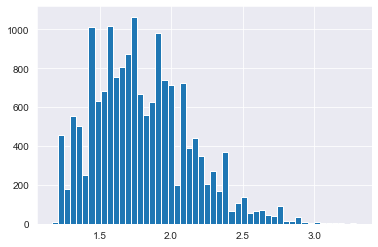

In [ ]:
fifa['wage_release_ratio']=fifa['release_clause_eur']/fifa['value_eur']
fifa['wage_release_ratio'].hist(bins=50)

It is observed that the release clause for most of the player is between 1.5 to 2 times the value of the player